In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Get CSV Files

In [51]:
df_2015 = pd.read_csv('data_source/2015.csv')
df_2016 = pd.read_csv('data_source/2016.csv')
df_2017 = pd.read_csv('data_source/2017.csv')
df_2018 = pd.read_csv('data_source/2018.csv')
df_2019 = pd.read_csv('data_source/2019.csv')

# Data prepocessing
- Changing all columns of each table to apprpriate names
- Common columns: ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']

In [52]:
# check column names
# drop Region, Happiness Rank, Standard Error, Dystopia Residual columns
# change names where appropriate
df_2015.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Standard Error',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [53]:
# drop Region, Happiness Rank, Lower Confidence Interval, 
# Upper Confidence Interval, Dystopia Residual columns
# change names where appropriate
df_2016.columns.tolist()

['Country',
 'Region',
 'Happiness Rank',
 'Happiness Score',
 'Lower Confidence Interval',
 'Upper Confidence Interval',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [54]:
# drop Happiness.Rank, Whisker.high, 
# whisker.low, Dystopia Residual columns
# change names where appropriate
df_2017.columns.tolist()

['Country',
 'Happiness.Rank',
 'Happiness.Score',
 'Whisker.high',
 'Whisker.low',
 'Economy..GDP.per.Capita.',
 'Family',
 'Health..Life.Expectancy.',
 'Freedom',
 'Generosity',
 'Trust..Government.Corruption.',
 'Dystopia.Residual']

In [55]:
# drop Overall rank column
# change names where appropriate
df_2018.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [56]:
# drop Overall rank column
# change names where appropriate
df_2019.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [57]:
df_2015 = df_2015.drop(columns = ['Region', 'Happiness Rank', 'Standard Error', 'Dystopia Residual'])
df_2015.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2015.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [58]:
df_2016 = df_2016.drop(columns = ['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df_2016.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity']
df_2016.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [59]:
df_2017 = df_2017.drop(columns = ['Happiness.Rank', 'Whisker.high', 'Whisker.low', 'Dystopia.Residual'])
df_2017.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2017 = df_2017.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2017.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [60]:
df_2018 = df_2018.drop(columns = ['Overall rank'])
df_2018.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2018 = df_2018.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])   
df_2018.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [61]:
df_2019 = df_2019.drop(columns = ['Overall rank'])
df_2019.columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Perceptions_of_Corruption']
df_2019 = df_2019.reindex(columns = ['Country', 'Score', 'Economy', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Perceptions_of_Corruption', 'Generosity'])
df_2019.head()

,Country,Score,Economy,Social_Support,Life_Expectancy,Freedom,Perceptions_of_Corruption,Generosity
0,Finland,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.298,0.322


# Insert code to load into database on PgAdmin4

# Check Linearity

# Linear Regression 

In [279]:
# Split dependent and independent variables
X = score_country_all_five_years[["Country Code"]]
y = score_country_all_five_years["Score"]

In [280]:
# Build Linear Regression model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [281]:
# Print Intercept & Coefficients
print(model.intercept_)
print(model.coef_)

5.335756611360891
[0.00052164]


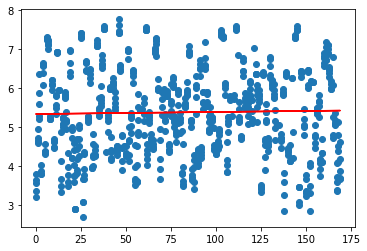

In [282]:
# Prediction
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [283]:
# Note: Not seeing linearity.

# Multiple Linear Regression (Test)

In [284]:
# Split dependent and independent variables
X = score_country_all_five_years[["Year", "Country Code"]]
y = score_country_all_five_years["Score"]

In [285]:
# Build Multi Linear Regression model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [286]:
# Print Intercept & Coefficients
print(model.intercept_)
print(model.coef_)

-6.039578199255189
[0.00563974 0.00052182]


In [287]:
# Prediction with sklearn
Enter_Year = 2026
Enter_Country_Code = 25
print ('Predicted Score: \n', model.predict([[Enter_Year, Enter_Country_Code]]))

Predicted Score: 
 [5.39958089]


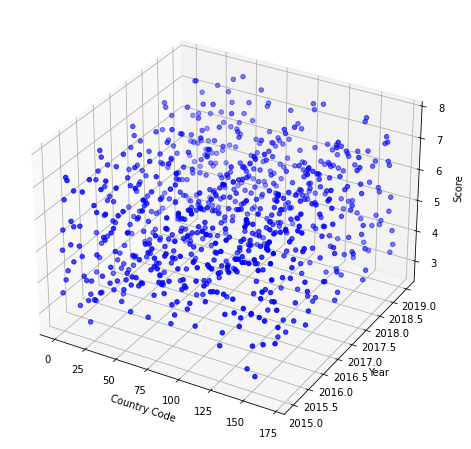

In [288]:
from mpl_toolkits.mplot3d import Axes3D

# Variables
x_ = score_country_all_five_years["Country Code"]
y_ = score_country_all_five_years["Year"]
z_ = score_country_all_five_years["Score"]

# build the figure instance
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_, y_, z_, c='blue', marker='o')

# set your labels
ax.set_xlabel('Country Code')
ax.set_ylabel('Year')
ax.set_zlabel('Score')

plt.show()

In [289]:
# Note: not seeing linearity with multi linear regression. Need to rethink approach in next sprint. 

In [290]:
# Hypothesis: need to create linear regression models for individual countries. X = year, y = score. 

# Second Hypothesis for Machine Learning Model: Outputs Label(s) for Input Data

## Check for Linearity¶

In [291]:
# Get dataframe for 
China_df = score_country_all_five_years[(score_country_all_five_years.Country == "China")]
China_df

,Country,Score,Year,Country Code
83,China,5.140,2015,29
82,China,5.245,2016,29
78,China,5.273,2017,29
85,China,5.246,2018,29
92,China,5.191,2019,29


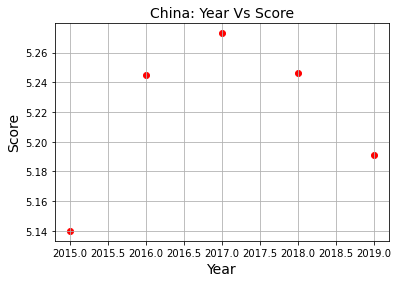

In [292]:
# Checking for Linearity (Year vs. Score)
plt.scatter(China_df['Year'], China_df['Score'], color='red')
plt.title('China: Year Vs Score', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.grid(True)
plt.show()

# Linear Regression 

In [293]:
# Split dependent and independent variables
X = China_df[["Year"]]
y = China_df["Score"]

In [294]:
# Build Linear Regression model 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [295]:
# Print Intercept & Coefficients
print(model.intercept_)
print(model.coef_)

-15.55610004730238
[0.0103]


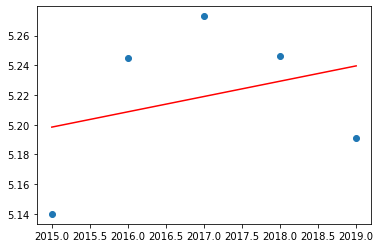

In [296]:
# Prediction
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [297]:
# Prediction with sklearn
Enter_Year = 2025
print ('Predicted Score: \n', model.predict([[Enter_Year]]))

Predicted Score: 
 [5.30139995]


In [298]:
# This model is working